Handwritten digits classification using neural network - Practice

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the required data of Handwritten digits from keras datasets.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
len(x_train), len(x_test)

(60000, 10000)

In [3]:
# x_train = 60000 images of 28x28 pixels each
# y_train = 60000 labels (0-9) for each image
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_train[0] #represents the first image in the training dataset

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

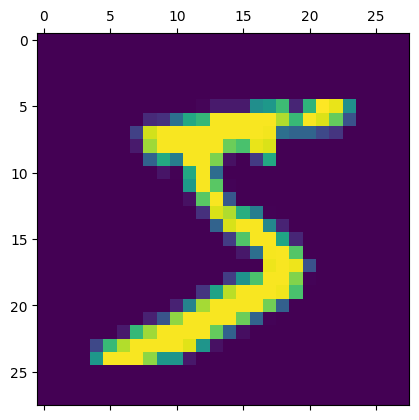

In [5]:
plt.matshow(x_train[0])

In [6]:
y_train[0]

np.uint8(5)

In [7]:
# Scalling down the data to range 0-1
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [8]:
# Flatten the 28x28 images into 1D array of 784 pixels
x_train_flattend = x_train_scaled.reshape(len(x_train_scaled), 28*28)
x_test_flattend = x_test_scaled.reshape(len(x_test_scaled), 28*28)
x_train_flattend.shape, x_test_flattend.shape

((60000, 784), (10000, 784))

In [9]:
x_train_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Objective1: To Build simple neural network model without hidden layers to classify the digits.

In [10]:
# Addition of output layer with 10 neurons
model_10 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

log_dir = "log_dir/handwrittendigits"
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Compiling the model using Adam optimizer and sparse categorical crossentropy loss function
model_10.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# epochs = number of times the model will see the entire dataset during training
model_10.fit(x_train_flattend, y_train, epochs=5, callbacks=[tb_callback])

d:\Development\ML\Deep Learning\DL Practice\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8777 - loss: 0.4706
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9151 - loss: 0.3037
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9212 - loss: 0.2840
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9238 - loss: 0.2730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9254 - loss: 0.2668


In [11]:
# Evaluating the model on test data
model_10.evaluate(x_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.9266 - loss: 0.2658


[0.2658330202102661, 0.9265999794006348]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


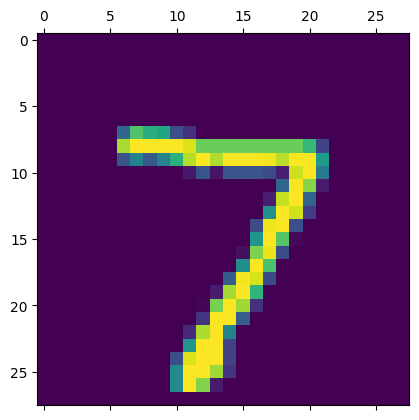

In [13]:
y_predicted = model_10.predict(x_test_flattend[0:1])
plt.matshow(x_test[0])

In [14]:
np.argmax(y_predicted[0]).item() # to get the index of highest probability

7

Creating the Confusion Matrix to evaluate the model performance.

In [15]:
y_predicted = model_10.predict(x_test_flattend)
y_predicted_labels = [np.argmax(i).item() for i in y_predicted]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step


[7, 2, 1, 0, 4]

Text(50.722222222222214, 0.5, 'Truth')

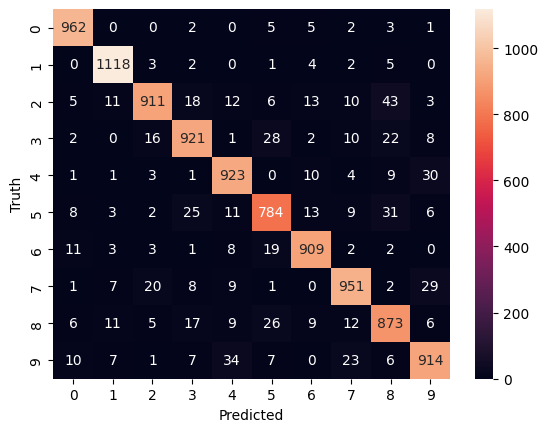

In [16]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Objective2: To Build neural network model with hidden layers to classify the digits.

In [17]:
# Addition of hidden layer with 200 neurons
model_200 = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'), # hidden layer with 200 neurons
    keras.layers.Dense(10, activation='sigmoid'), # no need to specify input shape for subsequent layers
])

# Compiling the model using Adam optimizer and sparse categorical crossentropy loss function
model_200.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# epochs = number of times the model will see the entire dataset during training
model_200.fit(x_train_flattend, y_train, epochs=10, callbacks=[tb_callback])

d:\Development\ML\Deep Learning\DL Practice\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9305 - loss: 0.2375
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9707 - loss: 0.0990
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9801 - loss: 0.0653
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9851 - loss: 0.0479
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0363
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9918 - loss: 0.0272
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9928 - loss: 0.0223
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9948 - loss: 0.0166
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9958 - loss: 0.0141
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9965 - loss: 0.0118


In [18]:
model_200.evaluate(x_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9790 - loss: 0.0806


[0.08064798265695572, 0.9789999723434448]

In [19]:
y_predicted = model_200.predict(x_test_flattend)
y_predicted_labels = [np.argmax(i).item() for i in y_predicted]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


[7, 2, 1, 0, 4]

Text(50.722222222222214, 0.5, 'Truth')

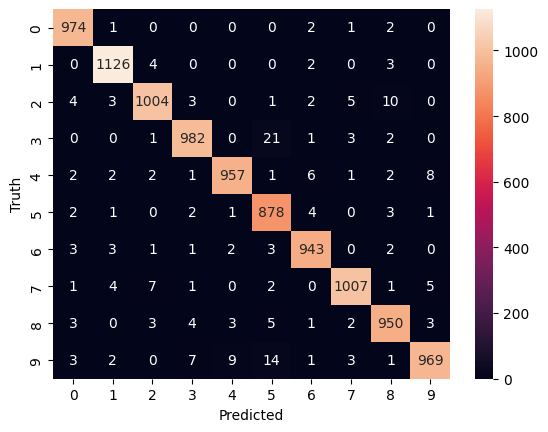

In [20]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

We can use inbuilt function of keras to flatten the images.

In [22]:
model_d = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_d.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model_d.fit(x_train_scaled, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9227 - loss: 0.2693
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9642 - loss: 0.1216
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9737 - loss: 0.0868
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0650
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0516
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9865 - loss: 0.0428
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9897 - loss: 0.0339
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0.0282
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9929 - loss: 0.0232
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9944 - loss: 0.0188


In [23]:
# No need to flatten the images as Flatten layer is already added in the model
model_d.evaluate(x_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9777 - loss: 0.0814


[0.08143673837184906, 0.9776999950408936]

In [24]:
y_predicted = model_d.predict(x_test_scaled)
y_predicted_labels = [np.argmax(i).item() for i in y_predicted]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step


[7, 2, 1, 0, 4]

Text(50.722222222222214, 0.5, 'Truth')

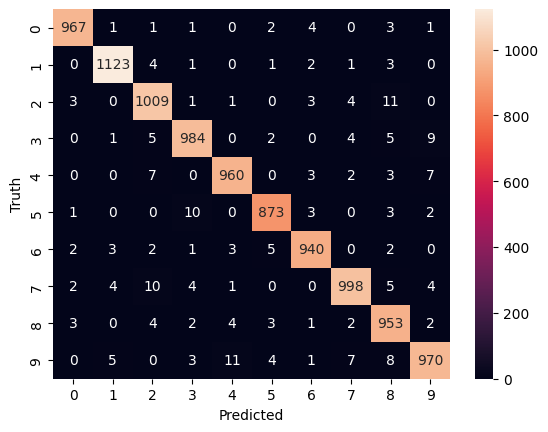

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')